<h1 align="center">
PROYECTO:    
    
<h6 align="center"> ANÁLISIS DE LAS CAUSALES DE INCENDIOS FORESTALES EN REPÚBLICA DOMINICANA EN LOS ÚLTIMOS 5 AÑOS. </h6>

</h1>

El proyecto de análisis de las causas de los incendios forestales en la República Dominicana genera varios valores sociales importantes. En primer lugar, desde una perspectiva medioambiental, busca contribuir a la preservación y protección de los recursos naturales del país, especialmente sus bosques y áreas forestales.

Reducir la incidencia de incendios forestales podría ayudar a conservar la biodiversidad, proteger los hábitats de la vida silvestre y mitigar el cambio climático al preservar los sumideros de carbono. Además, desde un punto de vista social, el proyecto busca proteger las comunidades cercanas a estas áreas, así como la infraestructura y los recursos económicos que dependen de los ecosistemas forestales.


### Indice:
- Fuentes de datos.
- Preguntas de análisis.
- Desarrollo.
- Conclusiones.
- Participantes.

#### Fuentes de datos:

- ###### Kaggle: https://www.kaggle.com/datasets/mbritofer/datosabiertosrd

- ###### Ministerio de Medios Ambiente: https://ambiente.gob.do/informacion-ambiental/estadisticas-ambientales/#548-720-2023-bosque

In [39]:
import pandas as pd
# You will need to install openpyxl in order to read_excels files.
incendios_data = pd.read_csv("../data/Incendios-Forestales-2021.csv", parse_dates=["Fecha origen", "Fecha Extincion"])

### Overviewing the data:

In [40]:
incendios_data.rename({"Mes de origen ": "Mes de origen"}, axis=1, inplace=True)
print(incendios_data.columns)

Index(['Unnamed: 0', 'no.', 'Municipio', 'Provincia', 'Mes de origen',
       'Dia de origen', 'Mes de extincion', 'Dia extincion', 'Causas',
       'Area Afectada en Tareas', 'Metros Cuadrados', 'Mes de origen .1',
       'Fecha origen', 'Fecha Extincion', 'Fecha Mes'],
      dtype='object')


In [41]:
incendios_data.head(5)

,Unnamed: 0,no.,Municipio,Provincia,Mes de origen,Dia de origen,Mes de extincion,Dia extincion,Causas,Area Afectada en Tareas,Metros Cuadrados,Mes de origen .1,Fecha origen,Fecha Extincion,Fecha Mes
0,0,1,Pedernales,Pedernales,Enero,5,Enero,7,Desconocida,665,418152.0,1,2021-01-05,2021-01-07,Jan-2021
1,1,2,Pedro Santana,Elías Piña,Enero,13,Enero,13,Conuquismo,95,59736.0,1,2021-01-13,2021-01-13,Jan-2021
2,2,3,Constanza,La Vega,Enero,3,Enero,3,Desconocida,1,628.8,1,2021-01-03,2021-01-03,Jan-2021
3,3,4,SAJOMA,Santiago,Enero,16,Enero,16,Desconocida,45,28296.0,1,2021-01-16,2021-01-16,Jan-2021
4,4,5,La Vega,La Vega,Enero,15,Enero,15,Intencional,8,5030.4,1,2021-01-15,2021-01-15,Jan-2021


## Preguntas de análisis:


### ¿Existe alguna relación entre las causas de los incendios y la duración o el tamaño del área afectada?

Se pueden realizar análisis de correlación para determinar si ciertas causas están asociadas con incendios más grandes o de mayor duración.

##### Tiempo promedio tomado para erradiar los incendios, según la causa y la provincia.


In [49]:
# Tiempo promedio tomado para erradiar los incendios, según la causa
import datetime
data = incendios_data.copy()

#data.loc[data['Fecha Extincion'] < data['Fecha origen']] 
#data.loc[data['Fecha Extincion'] < data['Fecha origen'], 'Fecha Extincion'] = data.loc[data['Fecha Extincion'] < data['Fecha origen'], 'Fecha Extincion'].apply(lambda x: x + datetime.timedelta(days=30))
data["Duracion Promedio Ext."] =  data["Fecha Extincion"] - data["Fecha origen"]
data = data.groupby(["Causas"])["Duracion Promedio Ext."].mean()
data.sort_values()

Causas
No Intencional                 0 days 00:00:00
Quema de Basura                0 days 00:00:00
Desconocida          0 days 06:10:17.142857142
Caminantes                     0 days 09:36:00
Conuquismo           0 days 10:44:46.567164179
Carboneros                     0 days 14:24:00
Colmeneros                     0 days 16:00:00
Intencional                    0 days 17:46:40
Ganaderia            0 days 19:23:04.615384615
Invasores                      1 days 00:00:00
Descarga Electrica             1 days 03:00:00
Huelguistas                    3 days 00:00:00
Name: Duracion Promedio Ext., dtype: timedelta64[ns]

<Axes: ylabel='Causas'>

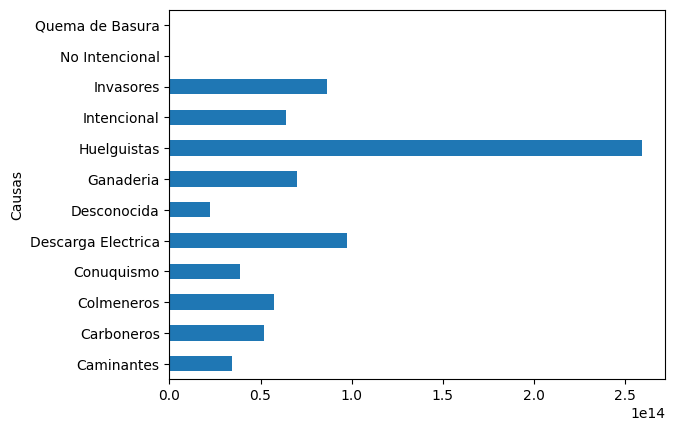

In [50]:
data.plot.barh()

##### Metros cuadrados totales afectados por tipo de causa.


In [55]:
# Metros cuadrados total afectados por tipo de causa.
causes_meter = incendios_data.groupby(["Causas"])['Metros Cuadrados'].sum().reset_index(name='Metros cuadrados total afectados')
causes_meter

,Causas,Metros cuadrados total afectados
0,Caminantes,496123.2
1,Carboneros,468456.0
2,Colmeneros,562776.0
3,Conuquismo,21695486.4
4,Descarga Electrica,17426563.2
5,Desconocida,2250475.2
6,Ganaderia,2154268.8
7,Huelguistas,78600.0
8,Intencional,2435971.2
9,Invasores,37728.0


<Axes: ylabel='Causas'>

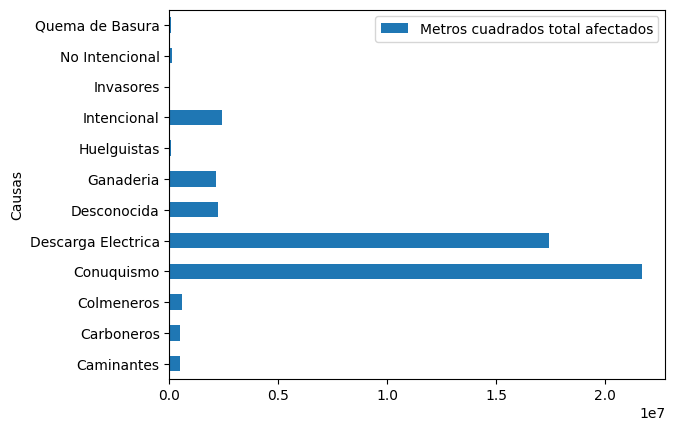

In [58]:
causes_meter.plot.barh(x="Causas")

In [51]:
##### Gráficas de provincias que sean visto afectas, cantidad de métros cuadrados afectados.
#prov_metersquare = incendios_data.groupby("Provincia")['Metros Cuadrados'].sum().sort_values(ascending=False)
#prov_metersquare.plot.barh(x="Provincias")

### ¿Cuál es la tendencia de los incendios forestales a lo largo del tiempo?

Al analizar la columna de fecha de origen, se pueden identificar tendencias a lo largo de los años, como si la frecuencia o la magnitud de los incendios ha aumentado o disminuido con el tiempo.

In [46]:
forest_fire_trend = incendios_data.groupby("Mes de origen")["Mes de origen"].size()
forest_fire_trend.sort_values(ascending=False).reset_index(name = "Cant. Incendios")

,Mes de origen,Cant. Incendios
0,Marzo,51
1,Febrero,37
2,Abril,36
3,Agosto,30
4,Mayo,27
5,Enero,20
6,Noviembre,13
7,Septiembre,11
8,Julio,10
9,Diciembre,8


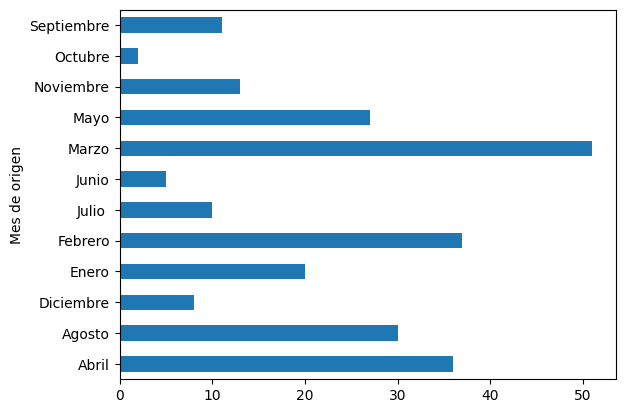

In [47]:
fig = forest_fire_trend.plot.barh()

# Resumen de incendios (2000 a 2024)

<Axes: xlabel='Años'>

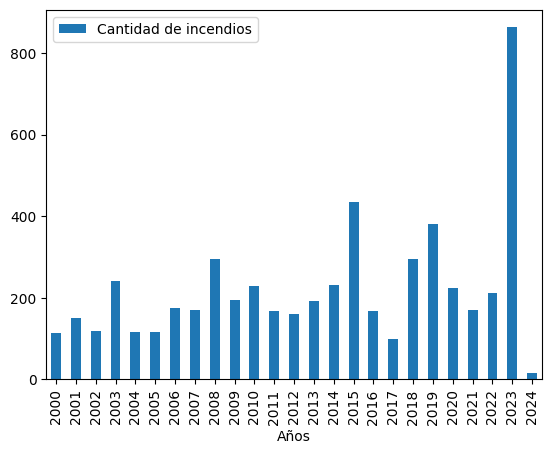

In [48]:
incendios_2000_act = pd.read_csv("../data/Incendios-Forestales-Ocurridos-2000-2021.csv")
incendios_2000_act.set_index("Años")

incendios_2000_act.plot.bar(x="Años", y="Cantidad de incendios")